In [1]:
#Clustering
#Clustering.py는 문장 임베딩 유사성을 기반으로 유사한 문장을 클러스터링하는 예를 보여줍니다.
# 참고 소스 : https://github.com/BM-K/KoSentenceBERT-ETRI
#

from sentence_transformers import SentenceTransformer, util
import numpy as np

#model_path = 'model/bmc_fpt_kowiki20200920.train_model_0225-s-bert-nli-sts-0303'
model_path = 'bongsoo/kpf-sbert-128d-v1'

/MOCOMSYS/anaconda3/envs/bong/lib/python3.9/site-packages/huggingface_hub/snapshot_download.py:6: FutureWarning: snapshot_download.py has been made private and will no longer be available from version 0.11. Please use `from huggingface_hub import snapshot_download` to import the only public function in this module. Other members of the file may be changed without a deprecation notice.
  warnings.warn(


In [2]:
embedder = SentenceTransformer(model_path)
print(embedder)

/MOCOMSYS/anaconda3/envs/bong/lib/python3.9/site-packages/huggingface_hub/file_download.py:621: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  warnings.warn(


SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': True}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Dense({'in_features': 768, 'out_features': 128, 'bias': True, 'activation_function': 'torch.nn.modules.activation.Tanh'})
)


In [26]:
# Corpus with example sentences

corpus = ['겨울에는 눈이 오고 춥다',
          '공연장에서 첼로를 연주하는것을 보았다.',
          '그 여자가 아이를 돌본다.',
          '한 남자가 아이와 놀아주고 있다',
          '한 남자가 말을 탄다.',
          '한 여자가 바이올린을 연주한다.',
          '두 남자가 수레를 숲 속으로 밀었다.',
          '한 남자가 담으로 싸인 땅에서 백마를 타고 있다.',
          '원숭이 한 마리가 드럼을 연주한다.',
          '치타 한 마리가 먹이 뒤에서 달리고 있다.',
          '한 남자가 파스타를 먹는다.',
          '고릴라 의상을 입은 누군가가 드럼을 연주하고 있다.',
          '사자가 들판을 달리고 있다.',
          '한 여자가 레스토랑에서 스테이크를 먹고 있다.',
          '치타가 들판을 가로 질러 먹이를 쫓는다.',
          '내일은 비가 많이 온다고 한다',
          '오늘은 날씨가 너무 좋다.',
          '배가 아파서 병원에 가야 한다',
          '배를 타고 낚시를 가고 있다.'
          '요트를 타고 세계일주를 한다',
          '음식을 잘못먹어서 배가 쓰리다.',
          '여객선을 타고 섬에 갔다.',
          ]
'''
corpus = [
'클라우드서비스 구축 신청서',
'사업자등록번호', 
'클라우드서비스 구축 기간',
 '최대 6개월 이내',
'클라우드서비스의 구분',
'[ ] SaaS (Software as a Service) (  간편등급  표준등급 )',
'인증받은 IaaS 서비스명',
'SaaS 보안인증 신청 시 중요자료를 다루는 전자결재, 회계관리, 인적자원관리, 보안서비스, PaaS 5개 분야를 제외하고는 모든 서비스 간편등급 신청이 가능',
'클라우드서비스 명칭',
'구축하고자 하는 SaaS 서비스명',
'클라우드서비스에 대한',
'구축될 클라우드서비스의 활용 분야(통신, 금융 등) 및 주요 기능 (이메일, Web Security)등 설명',
'. 본 시스템(서비스) 구축은 KISA의 클라우드 보안인증 수검을 위한 것으로, 다른 용도로 사용하지 않을 것을 서약하며, 본 용도 외 목적으로 사용중 발생하는 각종 문제에 대한 책임은 본 신청사에 있다.',
'. 구축 및 테스트를 위한 임시 사용 기간이 최대 6개월임을 인지하였으며, 연장시, 구축을 재신청하여야 함.',
'기간이 경과하였음에도 별도 재신청을 하지 않을 경우, IaaS 사업자는 자원을 회수하거나 접근 계정 삭제 등의 조치를 취할 수 있다.',
'. 신청사는 적절한 보안수준의 유지를 위하여 노력하여야 하며 각종 장애로 인하여 정상적인 서비스가 어려운 경우에 이를 신속하게 수리 및 복구하기 위해 성실히 협조한다.',
'위와 같이 클라우드 보안인증 취득 준비를 위한 클라우드서비스 구축을 진행하고자 합니다.',
'신청인(대표자) ',
'(서명 또는 인)'
]
'''

"\ncorpus = [\n'클라우드서비스 구축 신청서',\n'사업자등록번호', \n'클라우드서비스 구축 기간',\n '최대 6개월 이내',\n'클라우드서비스의 구분',\n'[ ] SaaS (Software as a Service) (  간편등급  표준등급 )',\n'인증받은 IaaS 서비스명',\n'SaaS 보안인증 신청 시 중요자료를 다루는 전자결재, 회계관리, 인적자원관리, 보안서비스, PaaS 5개 분야를 제외하고는 모든 서비스 간편등급 신청이 가능',\n'클라우드서비스 명칭',\n'구축하고자 하는 SaaS 서비스명',\n'클라우드서비스에 대한',\n'구축될 클라우드서비스의 활용 분야(통신, 금융 등) 및 주요 기능 (이메일, Web Security)등 설명',\n'. 본 시스템(서비스) 구축은 KISA의 클라우드 보안인증 수검을 위한 것으로, 다른 용도로 사용하지 않을 것을 서약하며, 본 용도 외 목적으로 사용중 발생하는 각종 문제에 대한 책임은 본 신청사에 있다.',\n'. 구축 및 테스트를 위한 임시 사용 기간이 최대 6개월임을 인지하였으며, 연장시, 구축을 재신청하여야 함.',\n'기간이 경과하였음에도 별도 재신청을 하지 않을 경우, IaaS 사업자는 자원을 회수하거나 접근 계정 삭제 등의 조치를 취할 수 있다.',\n'. 신청사는 적절한 보안수준의 유지를 위하여 노력하여야 하며 각종 장애로 인하여 정상적인 서비스가 어려운 경우에 이를 신속하게 수리 및 복구하기 위해 성실히 협조한다.',\n'위와 같이 클라우드 보안인증 취득 준비를 위한 클라우드서비스 구축을 진행하고자 합니다.',\n'신청인(대표자) ',\n'(서명 또는 인)'\n]\n"

In [24]:
# 모델을 통해 임베딩 계산
corpus_embeddings = embedder.encode(corpus)

In [5]:
# cosine 유사도 비교 예시
#from sklearn.metrics.pairwise import cosine_similarity
#cosine = cosine_similarity([corpus_embeddings[0]], [result[0]]) # (1,768) 식에 2차원 배열입력되어야 함.
#print(cosine)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


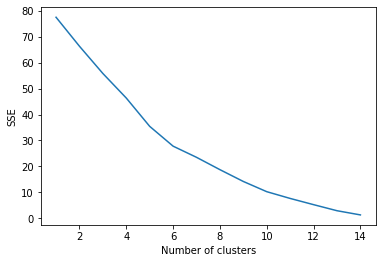

In [6]:
# 엘보우 그래프를 통한 최적 클러스터 수 지정
# 최적의 클러스터 수를 그래프로 보여줌.
# => 꺽이는 지점(엘보우)이 최적이 클러스터 수임.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 클러스터 범위 지정
n_clusters_range = range(1, len(corpus))

# SSE 값 저장할 리스트
sse = []

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0)
    kmeans.fit(corpus_embeddings)
    sse.append(kmeans.inertia_)

plt.plot(n_clusters_range, sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [7]:
# 실루엣 점수를 이용한 최적 클러스터수 지정
# -실루엣 점수는 클러스터 내의 응집도와 클러스터 간 분리도를 모두 고려하는 척도입니다. 
# -클러스터 수를 증가시키면서 실루엣 점수를 계산하고 가장 높은 값을 갖는 클러스터 수가 최적의 클러스터 수로 간주됩니다.
# - 실루엣 점수 범위는 0~1이고 1에 가까울수록 좋다.

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 임베딩이 저장된 리스트
embeddings = corpus_embeddings

# 클러스터 범위 지정
n_clusters_range = range(2, len(corpus))

# 실루엣 점수 저장할 리스트
silhouette_scores = []

print(f'*실루엣 스코어')
idx = 2
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0)
    kmeans.fit(embeddings)
    silhouette_scores.append(silhouette_score(embeddings, kmeans.labels_))
    print(f'{idx}:{silhouette_score(embeddings, kmeans.labels_)}')
    idx+=1

best_n_clusters = n_clusters_range[silhouette_scores.index(max(silhouette_scores))]

print(f'-------------------------------------------')
print(f'*Best number of clusters: {best_n_clusters}')

*실루엣 스코어
2:0.13515755534172058
3:0.1310611367225647
4:0.153165802359581
5:0.17212487757205963
6:0.1661088913679123
7:0.12242641299962997
8:0.13270752131938934
9:0.11929821968078613
10:0.12955625355243683
11:0.10894379019737244
12:0.0806831493973732
13:0.04966308921575546
14:0.021569401025772095
-------------------------------------------
*Best number of clusters: 5


In [27]:
# 클러스터링 처리함.
# => 이때 최적 클러스터수는 위에서 구한 실루엣 점수를 이용함
corpus_embeddings = embedder.encode(corpus)

# Then, we perform k-means clustering using sklearn:
from sklearn.cluster import KMeans

#num_clusters = 10
num_clusters = best_n_clusters
clustering_model = KMeans(n_clusters=num_clusters, init='k-means++', random_state=0)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['원숭이 한 마리가 드럼을 연주한다.', '고릴라 의상을 입은 누군가가 드럼을 연주하고 있다.']

Cluster  2
['두 남자가 수레를 숲 속으로 밀었다.', '치타 한 마리가 먹이 뒤에서 달리고 있다.', '사자가 들판을 달리고 있다.', '한 여자가 레스토랑에서 스테이크를 먹고 있다.', '치타가 들판을 가로 질러 먹이를 쫓는다.']

Cluster  3
['한 남자가 파스타를 먹는다.']

Cluster  4
['한 여자가 바이올린을 연주한다.']

Cluster  5
['겨울에는 눈이 오고 춥다', '내일은 비가 많이 온다고 한다', '오늘은 날씨가 너무 좋다.']

Cluster  6
['배를 타고 낚시를 가고 있다.요트를 타고 세계일주를 한다', '여객선을 타고 섬에 갔다.']

Cluster  7
['그 여자가 아이를 돌본다.', '한 남자가 아이와 놀아주고 있다']

Cluster  8
['배가 아파서 병원에 가야 한다', '음식을 잘못먹어서 배가 쓰리다.']

Cluster  9
['한 남자가 말을 탄다.', '한 남자가 담으로 싸인 땅에서 백마를 타고 있다.']

Cluster  10
['공연장에서 첼로를 연주하는것을 보았다.']



In [28]:
#---------------------------------------------------------------------------
# KMedoids = k-대푯값 군집 분석
# 참고 : https://todayisbetterthanyesterday.tistory.com/58

# scikit-learn-extra 설치
#!pip install scikit-learn-extra
#---------------------------------------------------------------------------

from sklearn_extra.cluster import KMedoids

# 클러스터링 모델 생성
kmedoids = KMedoids(n_clusters=num_clusters, random_state=0)

# 모델 피팅
kmedoids.fit(corpus_embeddings)

# 예측 결과
cluster_assignment = kmedoids.labels_

# 각 클러스터의 대표 샘플(index)
medoids = kmedoids.medoid_indices_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print(f'*대표 샘플:{corpus[medoids[i]]}')
    print("")
    


Cluster  1
['한 남자가 파스타를 먹는다.', '배가 아파서 병원에 가야 한다', '여객선을 타고 섬에 갔다.']
*대표 샘플:배가 아파서 병원에 가야 한다

Cluster  2
['한 남자가 아이와 놀아주고 있다', '오늘은 날씨가 너무 좋다.']
*대표 샘플:오늘은 날씨가 너무 좋다.

Cluster  3
['한 여자가 레스토랑에서 스테이크를 먹고 있다.', '치타가 들판을 가로 질러 먹이를 쫓는다.']
*대표 샘플:치타가 들판을 가로 질러 먹이를 쫓는다.

Cluster  4
['공연장에서 첼로를 연주하는것을 보았다.', '그 여자가 아이를 돌본다.', '한 여자가 바이올린을 연주한다.', '원숭이 한 마리가 드럼을 연주한다.', '고릴라 의상을 입은 누군가가 드럼을 연주하고 있다.', '사자가 들판을 달리고 있다.', '배를 타고 낚시를 가고 있다.요트를 타고 세계일주를 한다']
*대표 샘플:사자가 들판을 달리고 있다.

Cluster  5
['내일은 비가 많이 온다고 한다']
*대표 샘플:내일은 비가 많이 온다고 한다

Cluster  6
['치타 한 마리가 먹이 뒤에서 달리고 있다.']
*대표 샘플:치타 한 마리가 먹이 뒤에서 달리고 있다.

Cluster  7
['두 남자가 수레를 숲 속으로 밀었다.']
*대표 샘플:두 남자가 수레를 숲 속으로 밀었다.

Cluster  8
['한 남자가 말을 탄다.', '한 남자가 담으로 싸인 땅에서 백마를 타고 있다.']
*대표 샘플:한 남자가 말을 탄다.

Cluster  9
['음식을 잘못먹어서 배가 쓰리다.']
*대표 샘플:음식을 잘못먹어서 배가 쓰리다.

Cluster  10
['겨울에는 눈이 오고 춥다']
*대표 샘플:겨울에는 눈이 오고 춥다



In [10]:
cluster_id_list = [[] for i in range(5)]
print(len(cluster_id_list))

5


In [11]:
print(cluster_id_list[0])

[]


In [12]:
if not cluster_id_list[0]:
    print('None')

None


In [13]:
for cluster_sub in cluster_id_list:
    if not cluster_sub:
        print('None')

None
None
None
None
None
